Task 5: Decision Trees and Random Forests

Data Split Complete.
------------------------------
Decision Tree (Unconstrained) - Train Accuracy: 1.0000
Decision Tree (Unconstrained) - Test Accuracy:  0.9805
**OBSERVATION:** Large gap suggests overfitting.
------------------------------
Decision Tree (Max Depth=4) - Test Accuracy:  0.8571
------------------------------
Decision Tree (Max Depth=4) visualization data generated.
Random Forest (100 Trees) - Test Accuracy:  0.9805

--- Accuracy Comparison ---
DT (Overfit) Test Acc: 0.9805
DT (Controlled) Test Acc: 0.8571
RF Test Acc: 0.9805
------------------------------


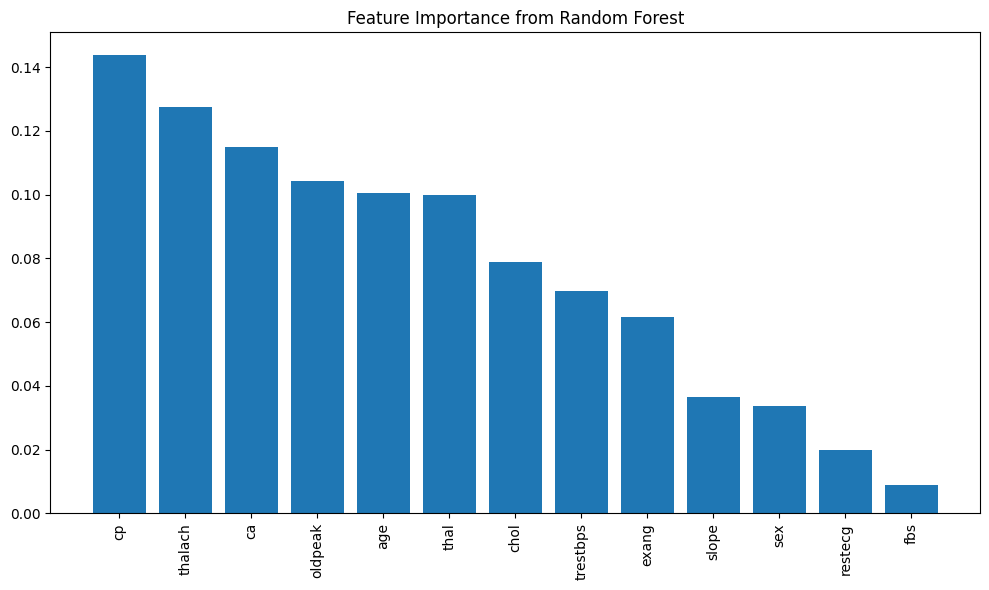

Feature Importance plot displayed.

Top 5 Most Important Features: ['cp', 'thalach', 'ca', 'oldpeak', 'age']

--- Cross-Validation Results ---
CV Scores (5 Folds): [1.         1.         0.98536585 1.         0.98536585]
Mean CV Accuracy: 0.9941
Standard Deviation: 0.0072


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import graphviz # Tool for visualization

# --- 1. Data Preparation and Setup ---
## NOTE: Replace 'heart.csv' with the actual path/name of your downloaded file
try:
    df = pd.read_csv('heart.csv')
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please ensure the Heart Disease dataset CSV is in the same directory.")
    exit()

# Handle the target column (often 'target' or 'num' where 0=no disease, 1-4=disease)
# Assuming 'target' column where 0 is healthy, 1 is disease
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Data Split Complete.")
print("-" * 30)

# --- 2. Decision Tree Classifier ---

## 2a. Train a MAX-DEPTH Decision Tree (Tends to overfit)
dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(X_train, y_train)

# Evaluation
train_acc_overfit = accuracy_score(y_train, dt_overfit.predict(X_train))
test_acc_overfit = accuracy_score(y_test, dt_overfit.predict(X_test))

print(f"Decision Tree (Unconstrained) - Train Accuracy: {train_acc_overfit:.4f}")
print(f"Decision Tree (Unconstrained) - Test Accuracy:  {test_acc_overfit:.4f}")
print("**OBSERVATION:** Large gap suggests overfitting.")
print("-" * 30)

## 2b. Train a Controlled Decision Tree (To prevent overfitting)
dt_controlled = DecisionTreeClassifier(max_depth=4, random_state=42) # Limiting depth
dt_controlled.fit(X_train, y_train)

# Evaluation
test_acc_controlled = accuracy_score(y_test, dt_controlled.predict(X_test))
print(f"Decision Tree (Max Depth=4) - Test Accuracy:  {test_acc_controlled:.4f}")
print("-" * 30)

## 2c. Visualize the Controlled Tree (using Graphviz)
dot_data = export_graphviz(
    dt_controlled,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
# graph.render("decision_tree_max_depth_4", view=True, format='png') # Uncomment to save and view
print("Decision Tree (Max Depth=4) visualization data generated.")


# --- 3. Random Forest Classifier ---

## 3a. Train a Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluation
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest (100 Trees) - Test Accuracy:  {rf_test_acc:.4f}")

# Comparison
print("\n--- Accuracy Comparison ---")
print(f"DT (Overfit) Test Acc: {test_acc_overfit:.4f}")
print(f"DT (Controlled) Test Acc: {test_acc_controlled:.4f}")
print(f"RF Test Acc: {rf_test_acc:.4f}")
print("-" * 30)

## 3b. Interpret Feature Importances
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1] # Sort descending

plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Random Forest")
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()
print("Feature Importance plot displayed.")

# Top 5 most important features
top_features = feature_names[sorted_indices][:5]
print(f"\nTop 5 Most Important Features: {list(top_features)}")


# --- 4. Evaluate using Cross-Validation ---

## Evaluate the Random Forest model using 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("\n--- Cross-Validation Results ---")
print(f"CV Scores (5 Folds): {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
